## Text Classification - Sentiment Analysis on IMDB Movie Reviews

This notebook shows an example of how to use text embeddings from TensorFlow Hub for text classification on IMDB movie reviews

In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
# Tensorflow and Tensorflow Hub
import tensorflow_hub as hub
import tensorflow as tf
tf.__version__

'2.13.0'

###  Data Pipeline

#### Loading the data into train test and validation sets

In [3]:
# Split the training set into 60% (for training) and 40% (for validation)
(train_data, validation_data, test_data) = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


#### Visualize the data

In [4]:
# Take a look at the texts of a few of the movie reviews
train_examples_batch, train_labels_batch = next(iter(train_data.batch(4)))
train_examples_batch

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [5]:
# Take a look at a few of the labels of the movie reviews
train_labels_batch

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 0, 0, 1])>

### Building the model

In [6]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:5]) # Note: each of the embedding vectors is 20-dimensional

<tf.Tensor: shape=(4, 20), dtype=float32, numpy=
array([[ 1.7657859 , -3.882232  ,  3.913424  , -1.5557289 , -3.3362343 ,
        -1.7357956 , -1.9954445 ,  1.298955  ,  5.081597  , -1.1041285 ,
        -2.0503852 , -0.7267516 , -0.6567596 ,  0.24436145, -3.7208388 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489715 , -1.1315986 ],
       [ 1.8804485 , -2.5852385 ,  3.4066994 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.7855542 ,  1.3874227 ,  3.8476458 , -0.9256539 ,
        -1.896706  ,  1.2113281 ,  0.11474716,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015903 , -1.6390051 ],
       [ 0.71152216, -0.63532174,  1.7385626 , -1.1168287 , -0.54515934,
        -1.1808155 ,  0.09504453,  1.4653089 ,  0.66059506,  0.79308075,
        -2.2268343 ,  0.07446616, -1.4075902 , -0.706454  , -1.907037  ,
         1.4419788 ,  1.9551864 , -0.42660046, -2.8022065 ,  0.43727067],
       [ 1.5164999 , -0.7103405 ,  1.8556769 , -1.2033532 , -1.3105817 ,

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# fitting the model on training data
# Set training parameters
NUM_EPOCHS = 20

In [10]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=NUM_EPOCHS,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 16s 353ms/step - loss: 0.9867 - accuracy: 0.4885 - val_loss: 0.7657 - val_accuracy: 0.4825
Epoch 2/20
30/30 [==============================] - 9s 294ms/step - loss: 0.7071 - accuracy: 0.5305 - val_loss: 0.6735 - val_accuracy: 0.5691
Epoch 3/20
30/30 [==============================] - 8s 258ms/step - loss: 0.6554 - accuracy: 0.5854 - val_loss: 0.6450 - val_accuracy: 0.5901
Epoch 4/20
30/30 [==============================] - 10s 321ms/step - loss: 0.6279 - accuracy: 0.6111 - val_loss: 0.6215 - val_accuracy: 0.6178
Epoch 5/20
30/30 [==============================] - 10s 294ms/step - loss: 0.6008 - accuracy: 0.6405 - val_loss: 0.5957 - val_accuracy: 0.6416
Epoch 6/20
30/30 [==============================] - 7s 218ms/step - loss: 0.5706 - accuracy: 0.6709 - val_loss: 0.5678 - val_accuracy: 0.6700
Epoch 7/20
30/30 [==============================] - 12s 390ms/step - loss: 0.5389 - accuracy: 0.6998 - val_loss: 0.5385 - val_accuracy: 0.7098
Ep

In [14]:
# Display training curves
def display_training_curves(history, title):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(NUM_EPOCHS)

  plt.plot(epochs_range, acc, label='Train accuracy')
  plt.plot(epochs_range, val_acc, label='Val accuracy')
  plt.title(title)
  plt.legend(loc='upper left')
  plt.figure()

  plt.show()

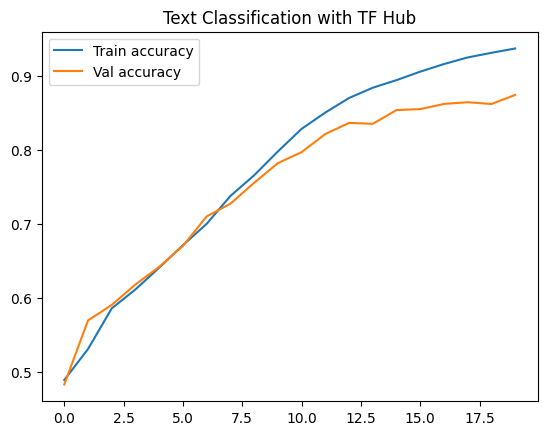

<Figure size 640x480 with 0 Axes>

In [15]:
# Display training curve
display_training_curves(history, "Text Classification with TF Hub")

In [16]:
# evaluation on testing data
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 2s - loss: 0.3170 - accuracy: 0.8635 - 2s/epoch - 37ms/step
loss: 0.317
accuracy: 0.863
